In [2]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-v0_8-colorblind')

In [13]:
import json
import awkward as ak
import pathlib
data = ak.from_json(pathlib.Path("outputNewData50BIB.json"))




In [7]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label=""):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    else: data_flat = (data)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    plt.show()

    # a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label=""):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    plt.show()

In [8]:

def compare1DHistograms(datas,bins,scale='linear',label="",leg=[]):

    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    for i,data in enumerate(datas): 

        # handle data, there must be a smarter way to do this...
        if type(data[0])==np.int64   : data_flat=data
        elif type(data[0])==np.float32 : data_flat=data
        else : data_flat = ak.flatten(data, axis=None)
        counts, bins, bars = ax.hist(data_flat, bins, alpha=0.5, label=leg[i] if len(leg)>i else "")
        print(counts)
   
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title("1D Comparison between matched and truth muons (BIB)")
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.legend()
    plt.yscale(scale)
    plt.show()

[54. 74. 53. 44. 62. 53. 56. 45. 48. 52. 43. 40. 54. 55. 56. 50. 41. 52.
 48. 59. 61. 52. 56. 45. 60. 64. 54. 50. 58. 45. 49. 50. 54. 45. 48. 77.
 47. 51. 54. 40. 52. 52. 46. 45. 51. 61. 61. 52. 50.]
[19. 39. 20. 22. 29. 33. 29. 18. 20. 21. 17. 14. 38. 27. 28. 23. 24. 30.
 25. 37. 33. 32. 27. 24. 27. 38. 35. 21. 38. 25. 30. 35. 28. 26. 19. 43.
 26. 32. 32. 24. 32. 24. 34. 29. 29. 33. 34. 29. 30.]


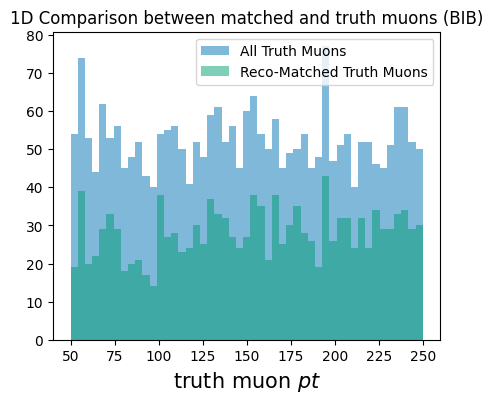

[  0.   0.   0.   0.   0.   6.  48.  60.  80. 110. 154. 189. 252. 268.
 277. 290. 218. 185. 147. 108.  68.  68.  38.   3.   0.   0.   0.   0.
   0.]
[  0.   0.   0.   0.   0.   3.  26.  43.  65.  62.  28. 142. 230. 122.
  15. 125. 177. 143.  29.  51.  54.  46.  19.   2.   0.   0.   0.   0.
   0.]


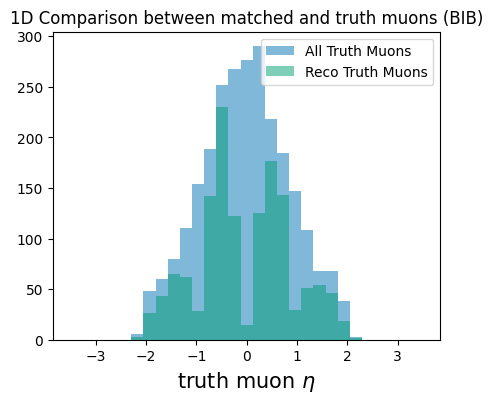

[  0.  42.  91. 103. 105.  87. 103.  96.  93.  96.  85.  99.  91. 111.
  95. 101. 114. 114. 119. 106. 100.  93.  96. 102.  93. 100.  80.  54.
   0.]
[ 0. 24. 40. 53. 50. 48. 59. 57. 49. 56. 40. 60. 60. 59. 58. 52. 66. 63.
 53. 54. 52. 54. 52. 49. 44. 54. 46. 30.  0.]


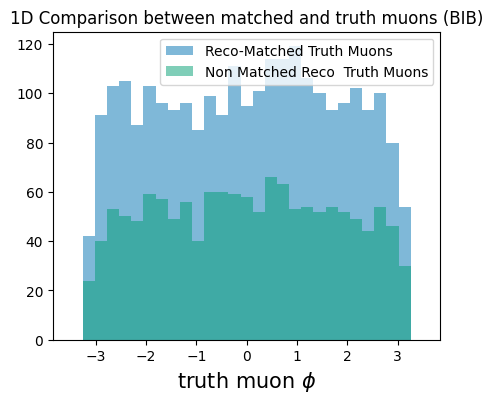

In [14]:
# Steps towards efficiency
import numpy as np

arrays = [data["mcp_pt"],data["mcp_mu_match_pt"]]




legend = [ "All Truth Muons","Reco-Matched Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(50,250,50), leg=legend, label=";truth muon $pt$")

c = data["mcp_eta"]
d = data["mcp_mu_match_eta"]

arrays = [c,d]
legend = [ "All Truth Muons","Reco Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(-3.5,3.5,30), leg=legend, label=";truth muon $\eta$")

e = data["mcp_phi"]
f = data["mcp_mu_match_phi"]


arrays = [e,f]
legend = [ "Reco-Matched Truth Muons","Non Matched Reco  Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(-3.5,3.5,30), leg=legend, label=";truth muon $\phi$")


In [23]:
import numpy as np
def plotEff(data1, data2,bins, scale='linear',label=""):
        fig = plt.figure(figsize=(5,4))
        ax = fig.add_subplot(111)
        data = ak.to_list(ak.flatten(data1, axis=None))
        d3 = ak.to_list(ak.flatten(data2, axis=None))
   
        x =  np.histogram(d3, bins)
        y1 = x[0]
        x3 = x[1]
        y1 = y1[:len(y1)]
        print(y1)
   
        x2 = np.histogram(data, bins)
        x1 = x2[1]
        y2 = x2[0]
        x1 = x1[:len(x1)-1]
        print(y2)
        arr = []
        for i in range(len(y2)):
                if y1[i] == 0:
                        y1[i] = 1
                z = float(y2[i])/y1[i]
                if z >= 1:
                        z = 1.0

                arr.append(z)

        

        error = np.sqrt(arr)/np.sqrt(50)
        wid = (max(bins)-min(bins))/len(bins)
        print(wid)

        
        ax.errorbar(x1, arr,error, marker='o',markersize='3', linestyle='')

      
        # handle labels
        title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
        xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
        ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
        
        ax.set_title("Reconstruction Efficency for V1 Muon Collider (BIB)")
        ax.set_xlabel(xlabel, fontsize=15)
        ax.set_ylabel(ylabel, fontsize=15)
        plt.yscale(scale)
        plt.show()

[73 83 60 75 70 60 61 62 59 48 68 76 55 60 61 72 71 71 64 68 83 65 69 58
 63 64 60 67 78 66 68 54 62 61 58 66 80 65 65]
[32 38 25 37 41 31 22 27 22 23 41 38 26 33 35 43 40 39 34 32 49 37 41 31
 41 39 34 27 46 40 40 29 37 39 37 38 40 42 36]
5.0


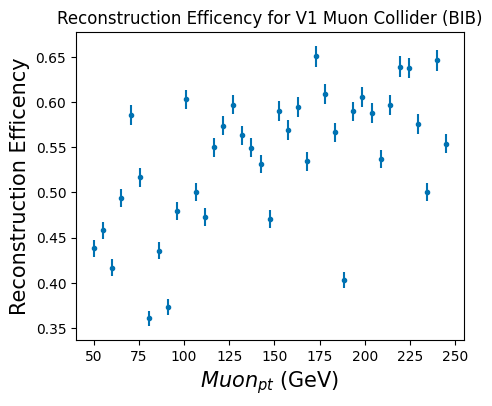

In [20]:
plotEff(data["mcp_mu_match_pt"],data["mcp_pt"],bins=np.linspace(50,250,40),label=";$Muon_{pt} $ (GeV);Reconstruction Efficency")

[65 42 58 57 51 40 63 53 41 49 59 51 50 65 47 56 55 52 65 64 59 58 65 68
 52 53 60 49 49]
[40 21 35 31 28 22 37 24 22 32 32 35 30 36 26 33 31 27 38 35 37 25 27 38
 19 32 33 23 31]
0.12666666666666665


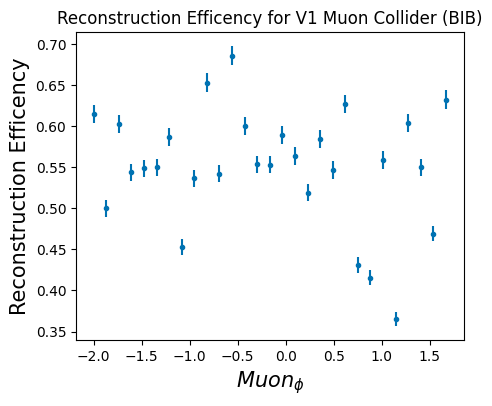

In [21]:
plotEff(data["mcp_mu_match_phi"],data["mcp_phi"],bins=np.linspace(-2,1.8,30),label=";$Muon_{\phi} $;Reconstruction Efficency")

[ 23  29  37  42  54  58  68  91 110 104 142 139 132 184 159 166 163 136
 113 114  93  78  78  53  53  26  41  33  19]
[ 13  16  29  34  41  41  16   2  80  82 125 121  77  35  14  19  93 105
  95  91  67   5  18  29  39  20  34  15  12]
0.13333333333333333


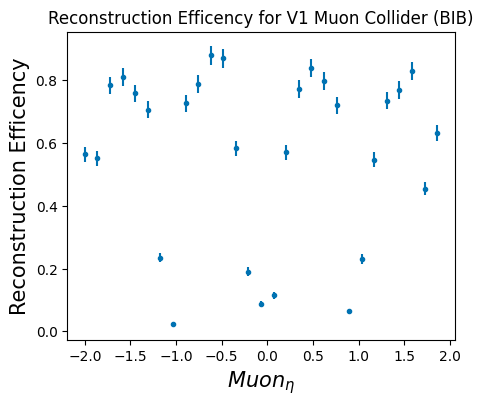

In [24]:
plotEff(data["mcp_mu_match_eta"],data["mcp_eta"],bins=np.linspace(-2,2,30),label=";$Muon_{\eta} $;Reconstruction Efficency")

[  0  42  91 103 105  87 103  96  93  96  85  99  91 111  95 101 114 114
 119 106 100  93  96 102  93 100  80  54   0]
[ 0 24 40 53 50 48 59 57 49 56 40 60 60 59 58 52 66 63 53 54 52 54 52 49
 44 54 46 30  0]
0.23333333333333334


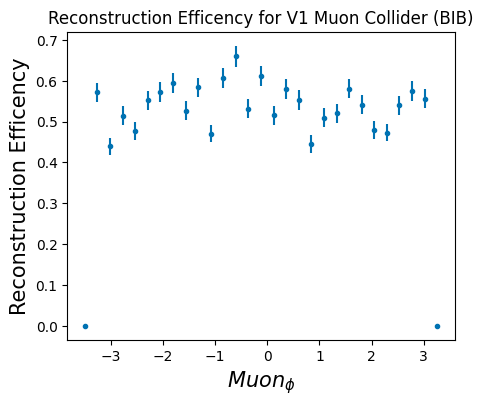

In [25]:
plotEff(data["mcp_mu_match_phi"],data["mcp_phi"],bins=np.linspace(-3.5,3.5,30),label=";$Muon_{\phi} $;Reconstruction Efficency")

<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
